In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
%matplotlib inline

In [15]:
data= pd.read_csv('cStick (1).csv')
data.head()

,Distance,Pressure,HRV,Sugar level,SpO2,Accelerometer,Decision
0,25.540,1.0,101.396,61.080,87.770,1.0,1
1,2.595,2.0,110.190,20.207,65.190,1.0,2
2,68.067,0.0,87.412,79.345,99.345,0.0,0
3,13.090,1.0,92.266,36.180,81.545,1.0,1
4,69.430,0.0,89.480,80.000,99.990,0.0,0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2039 entries, 0 to 2038
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Distance       2039 non-null   float64
 1   Pressure       2039 non-null   float64
 2   HRV            2039 non-null   float64
 3   Sugar level    2039 non-null   float64
 4   SpO2           2039 non-null   float64
 5   Accelerometer  2039 non-null   float64
 6   Decision       2039 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 111.6 KB


In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Distance,2039.0,28.694527,23.773644,0.0,7.6425,20.560,55.2055,69.981
Pressure,2039.0,0.988720,0.815918,0.0,0.0000,1.000,2.0000,2.000
HRV,2039.0,95.657002,17.576499,60.0,82.4180,97.238,109.6950,124.980
Sugar level,2039.0,72.909243,46.940110,10.0,40.2300,69.960,77.6125,179.293
SpO2,2039.0,83.563649,11.111592,60.0,75.2850,85.280,92.6925,99.990
Accelerometer,2039.0,0.661599,0.473282,0.0,0.0000,1.000,1.0000,1.000
Decision,2039.0,0.988720,0.815918,0.0,0.0000,1.000,2.0000,2.000


In [18]:
data.isnull().sum()

Distance         0
Pressure         0
HRV              0
Sugar level      0
SpO2             0
Accelerometer    0
Decision         0
dtype: int64

In [93]:
print(data['Accelerometer'].unique())

[1. 0.]


<AxesSubplot:xlabel='Distance'>

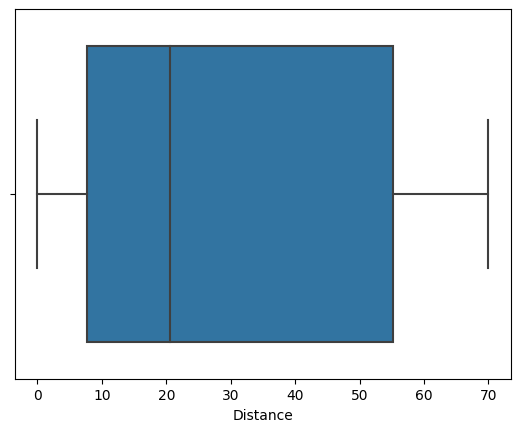

In [19]:
sns.boxplot(x=data['Distance'])

<AxesSubplot:xlabel='Pressure'>

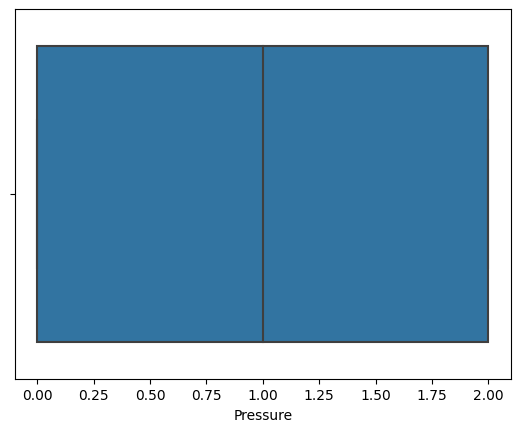

In [20]:
sns.boxplot(x=data['Pressure'])

<AxesSubplot:xlabel='HRV'>

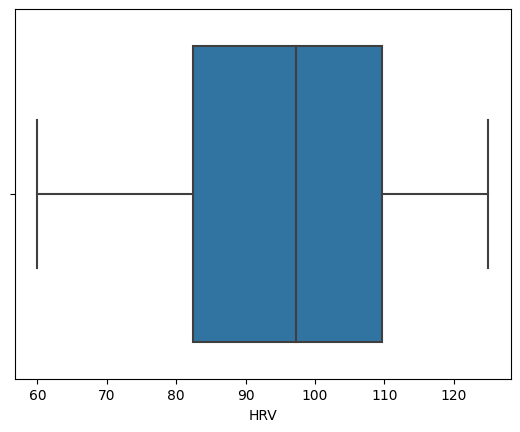

In [21]:
sns.boxplot(x=data['HRV'])

<AxesSubplot:xlabel='Sugar level'>

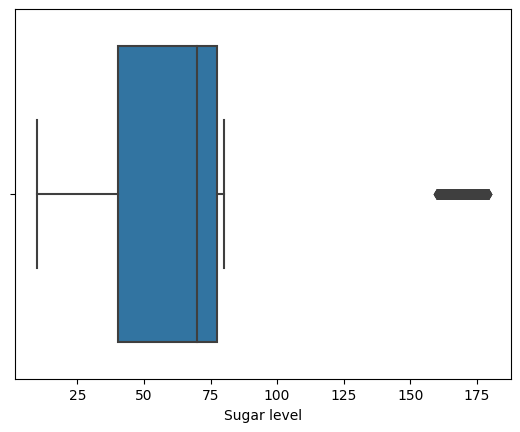

In [22]:
sns.boxplot(x=data['Sugar level'])

<AxesSubplot:xlabel='SpO2'>

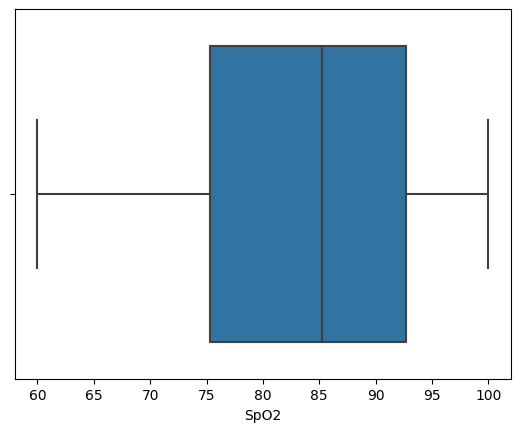

In [23]:
sns.boxplot(x=data['SpO2'])

<AxesSubplot:xlabel='Accelerometer'>

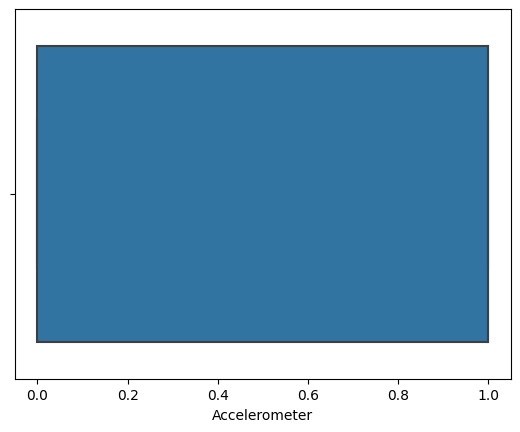

In [24]:
sns.boxplot(x=data['Accelerometer'])

<AxesSubplot:xlabel='Decision '>

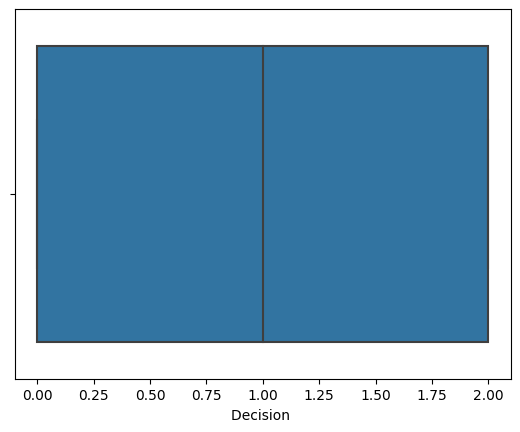

In [25]:
sns.boxplot(x=data['Decision '])

In [27]:
data['Decision '].value_counts()

0    690
1    682
2    667
Name: Decision , dtype: int64

In [28]:
q1=data['Sugar level'].quantile(0.25)
q2=data['Sugar level'].quantile(0.50)
q3=data['Sugar level'].quantile(0.75)
iqr=q3-q1
iqr


upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
upper_limit,lower_limit


#replacing upper values with upper limit and lower values with lower limit
def limit_imputer(value):
    if value > upper_limit:
        return upper_limit
    if value < lower_limit:
        return lower_limit
    else:
        return value

data['Sugar level'] = data['Sugar level'].apply(limit_imputer)

<AxesSubplot:xlabel='Sugar level'>

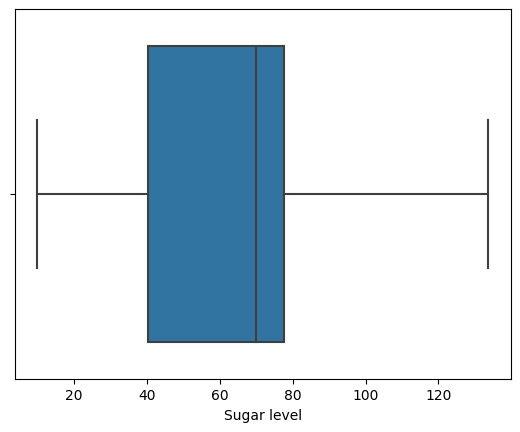

In [30]:
sns.boxplot(x=data['Sugar level'])

In [31]:
X= data.drop('Decision ',axis=1)
X.head()

,Distance,Pressure,HRV,Sugar level,SpO2,Accelerometer
0,25.540,1.0,101.396,61.080,87.770,1.0
1,2.595,2.0,110.190,20.207,65.190,1.0
2,68.067,0.0,87.412,79.345,99.345,0.0
3,13.090,1.0,92.266,36.180,81.545,1.0
4,69.430,0.0,89.480,80.000,99.990,0.0


In [32]:
Y= data[['Decision ']]
Y.head()

,Decision
0,1
1,2
2,0
3,1
4,0


In [34]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,Y_train,Y_test = tts(X,Y,test_size=0.20,random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1631, 6), (408, 6), (1631, 1), (408, 1))

In [42]:
# seed = 7
# models = []
# models.append(('LR', LogisticRegression()))
# models.append(('LDA', LinearDiscriminantAnalysis()))
# models.append(('KNN', KNeighborsClassifier()))
# models.append(('CART', DecisionTreeClassifier()))
# models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC()))

In [43]:
# results = []
# names = []
# scoring = 'accuracy'
# for name, model in models:
#  kfold = model_selection.KFold(n_splits=10, shuffle= True,random_state=seed)
#  cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
#  results.append(cv_results)
#  names.append(name)
#  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#  print(msg)
# # boxplot algorithm comparison
# fig = plt.figure()
# fig.suptitle('Algorithm Comparison')
# ax = fig.add_subplot(111)
# plt.boxplot(results)
# ax.set_xticklabels(names)
# plt.show()

In [66]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model=SVC(kernel='poly', C=100.0) 
model.fit(X_train,Y_train)

y_pred=model.predict(X_test)

print('Accuracy:' ,accuracy_score(Y_test, y_pred)*100)


Accuracy: 100.0


c:\Users\16373\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [70]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       128
           2       1.00      1.00      1.00       138

    accuracy                           1.00       408
   macro avg       1.00      1.00      1.00       408
weighted avg       1.00      1.00      1.00       408



Confusion matrix

 [[142   0   0]
 [  0 128   0]
 [  0   0 138]]


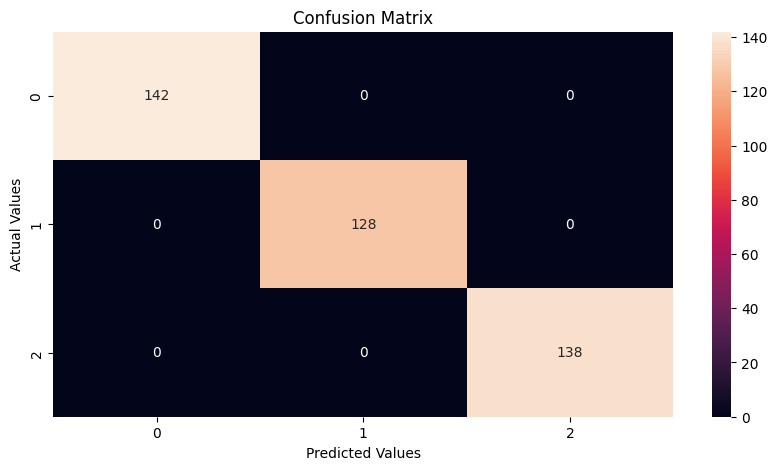

In [83]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_pred)

print('Confusion matrix\n\n', cm)

cm_df = pd.DataFrame(cm,
                     index = ['0','1','2'], 
                     columns = ['0','1','2'])
plt.figure(figsize=(10,5))
sns.heatmap(cm_df,annot=True,fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()


In [84]:
print(model.predict([[25,1,100,60,87,1]]))

[1]


c:\Users\16373\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [87]:
import pickle
pickle.dump(model,open("model.pkl","wb"))